<a href="https://colab.research.google.com/github/Magvride/Spotify-Recommendations/blob/main/Ci%C3%AAncia_de_Dados_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação de pacotes necessários




##
  - **Numpy** - **computação numérica** em Python
 - **Pandas** - Manipulação e **análise de dados**
 - **SciPy**- Escossistema para matemática, ciência e engenharia
 - **Matplotlib** - **Visualizações** em Python
 - **Seaborn** - Visualização estatística



In [6]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento do Dataset


In [7]:
#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)

In [8]:
#Imprimir primeiras linhas do dataset
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [9]:
#Informações geral do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#Resumo estatístico do dataset

In [ ]:
print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

#Medidas de tendencia central




## **Moda** para variables categoricas

In [ ]:
#Criação de uma lista com as columnas que quermos saber as medidas de tendencia central
#Se seleccionaron las variables que hacian mas sentido conocer la T.C
features = ['track_name', 'track_artist', 'playlist_genre', 'track_album_name']

###Um jeito de conhecer a moda de diferentes variaveis **.mode()**

In [ ]:
for feature in features:
  moda_val = df[feature].mode()[0]
  print()
  print(f"A moda do atributo {feature} é {moda_val}")

###Jeito de conhecer a moda com função **.value_counts()**

In [ ]:
print(df["track_name"].value_counts().idxmax())
print(df['track_name'].value_counts().max())

##**Mediana** e **media** para variaveis numericas

In [ ]:
featuresNumericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for featureNumerica in featuresNumericas:
  media_val= df[featureNumerica].median()
  print()
  print(f"A media de {featureNumerica} é {media_val}")
  mediana_val = df[featureNumerica].mean()
  print(f"A mediana de {featureNumerica} é {mediana_val}")


##Graficos de tendencia central


In [ ]:
featuresNumericas1 = ['liveness', 'valence', 'tempo', 'duration_ms']
fig, axes = plt.subplots(1, 4, figsize=(22, 4))
fig.suptitle('Medidas de Tendência Central: Média vs Mediana', fontsize=14, y=1.05)

for idx, feature in enumerate(featuresNumericas1):
    ax = axes[idx]
    # Histograma
    ax.hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    #Definir valores de media y mediana para no caer en el error de tener el mismo
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    #Definir lineas que pasen por los histogramas
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend() #colocar cuadrito indicando los valores

    #colocar titulo, nombre en x, nombre en y
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma de {feature}')


#Medidas de dispersão

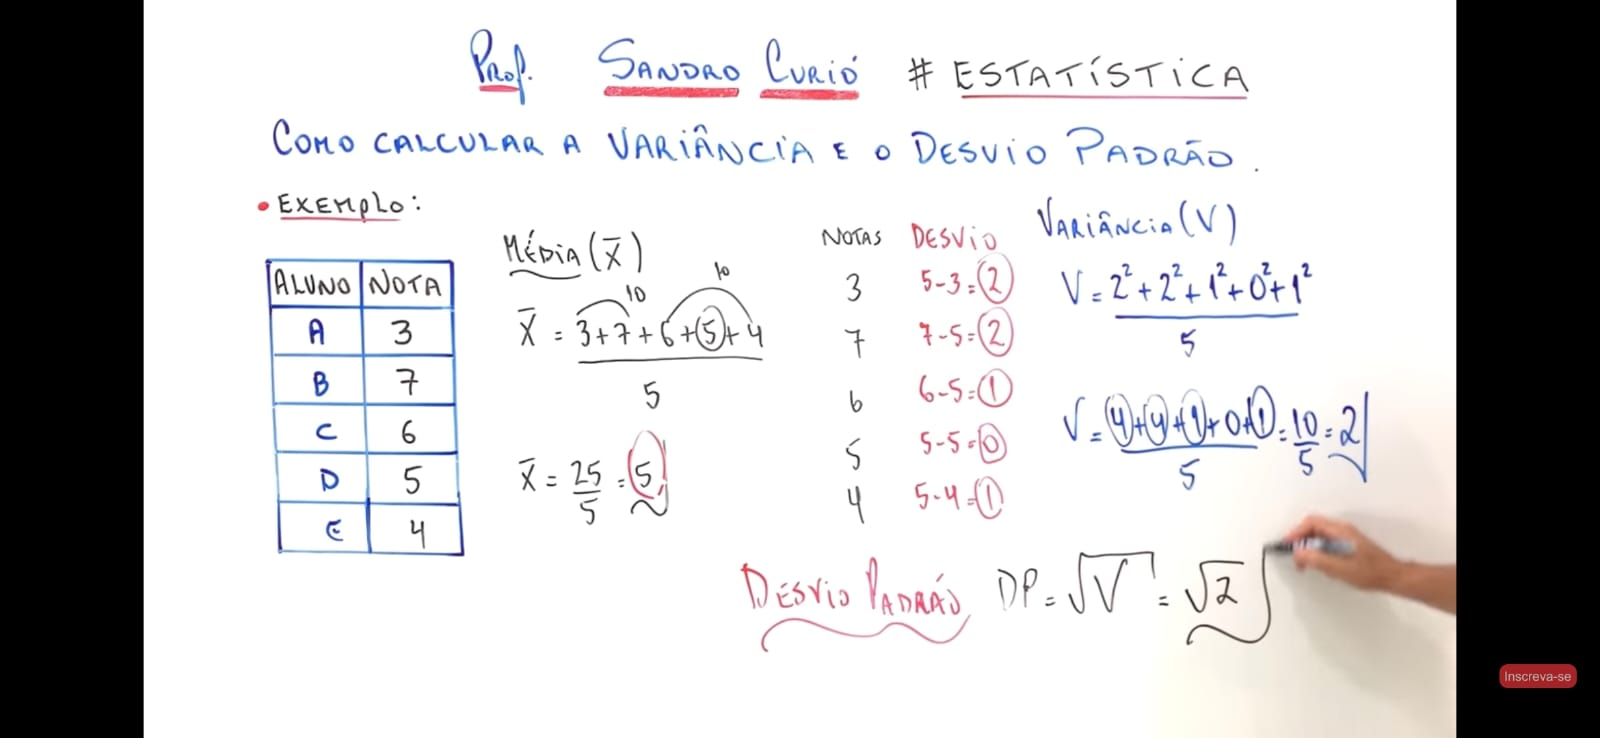

### Amplitude, Variância, Desvio Padrão e Coeficiente de Variação

> **Amplitude**: Diferença entre o maior e menor valor. Medida simples que indica o alcance total dos dados, mas muito sensível a outliers.
>
> **Variância**: Média dos quadrados dos desvios em relação à média. Mede o quão espalhados estão os dados, mas em unidades quadradas.

**Cuanto mayor sea la varianza mayor dispersión existirá y por tanto, menor representatividad tendrá la media aritmética**

Datos de temperatura en una ciudad

20, 10, 30  media  20  dispersión 3,16

---


20  20  20  media  20  dispersión 0

---


30  10  10  media  20  dispersion 3,8729

---



La media es la misma, pero claramente la variación de temperatura en esa ciudad
es totalmente inestable en el caso 3 y estable en el caso 2.

>
> **Desvio Padrão**: Raiz quadrada da variância. Indica o quanto os dados se desviam da média, na mesma unidade dos dados originais. Regra empírica: ~68% dos dados estão dentro de ±1 desvio padrão.
>
> **Coeficiente de Variação**: Razão entre desvio padrão e média (em %). Permite comparar variabilidade entre variáveis com diferentes escalas. CV < 10% indica baixa variabilidade.

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for feature in features:
  print(f'{feature}')
  print(f"Desvio padrão : {df[feature].std()}")
  print(f"Varianza : {df[feature].var()}")
  print(f"Media : {df[feature].mean()}")
  print(f"Amplitude : {df[feature].max()-df[feature].min()}")
  print(f"CV : {df[feature].std()/df[feature].mean()}")
  print("\n")

El Coeficiente de Variación (CV) mide la variabilidad relativa de tus datos en porcentaje, y lo que se considera “decente” o “aceptable” depende mucho del campo de aplicación y de qué tan homogéneos se espera que sean los datos.

En términos generales:

📊 CV < 10% → Variabilidad muy baja → datos bastante homogéneos.

📊 CV entre 10% y 20% → Variabilidad moderada → aceptable en la mayoría de contextos.

📊 CV entre 20% y 30% → Variabilidad relativamente alta → hay dispersión importante, pero puede ser normal en algunos fenómenos sociales o biológicos.

📊 CV > 30% → Variabilidad muy alta → los datos son poco consistentes, puede indicar heterogeneidad fuerte o necesidad de investigar más.

In [ ]:
import pandas as pd

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df_cv = pd.DataFrame(columns=["caracteristica", "desvio_padrao", "cv", "variabilidad"])

for feature in features:
    std_val = df[feature].std()
    mean_val = df[feature].mean()
    cv = abs(std_val / mean_val)  # Coeficiente de variación relativo

    # Definimos la etiqueta según el CV
    if cv < 0.10:
        variabilidad = "Variabilidad muy baja"
    elif cv < 0.20:
        variabilidad = "Variabilidad moderada"
    elif cv < 0.30:
        variabilidad = "Variabilidad relativamente alta"
    else:
        variabilidad = "Variabilidad muy alta"

    # Añadimos la fila al DataFrame
    df_cv = pd.concat([df_cv, pd.DataFrame([{
        "caracteristica": feature,
        "desvio_padrao": std_val,
        "cv": cv,
        "variabilidad": variabilidad
    }])], ignore_index=True)

# Mostramos el DataFrame
pd.set_option("display.float_format", "{:.4f}".format)  # opcional, para números más bonitos
df_cv


1️⃣ Sobre la variabilidad de las variables key hasta valence

**key:** representa la tonalidad de la canción (0 a 11). Es una variable discreta que puede tomar valores muy distintos entre canciones, por eso tiene un CV alto (~0.67). Eso es esperado, porque las canciones no están concentradas en una sola tonalidad.

**mode:** indica mayormente si la canción está en modo mayor o menor (0 o 1). Aunque es binaria, si la media está cerca de 0 o 1, el CV puede ser muy alto porque el denominador (media) es pequeño, incluso llegando a valores mayores a 1.

**speechiness:** mide cuán hablada es la pista. Las canciones varían mucho en esto (desde 0 hasta casi 1), entonces es natural un CV alto.

**acousticness e instrumentalness:** también son proporciones entre 0 y 1, pero muchas canciones tienen valores cercanos a 0 (muy poca instrumentalidad o acústico). Si la media es muy pequeña, el CV = std / media puede ser >1, lo que explica los valores altos.

**liveness y valence:** son características que dependen del contenido y emoción de la canción. La música es muy heterogénea, por eso CV alto también tiene sentido.

💡 Conclusión: No es extraño que estas variables tengan alta variabilidad. Muchas **son proporciones o categorías discretas con distribuciones no centradas en la media, lo que provoca CV altos**.

## Problema 1 : Speechiness

A continuación para entender que nos quiere decir las medidas de dispersión, se realizó una comparación para la variable **Speechiness** en la canción más escuchada, para entender cual seria el valor de Speechiness más frecuente.

Sin embargo se está teniendo una contradicción porque el valor de **Speechiness** está siendo diferente para la misma canción, lo que genera una duda en cuanto a la consistencia de los datos dentro del contexto de la música.

###Marco Teorico de la variables **Speechiness**

🎵 Speechiness mide qué tanto una canción se parece a la habla (voz hablada).

🔹 Cerca de 1.0 → casi todo es hablado (ej: audiolibro, podcast, charla, poesía).

🔹 Entre 0.33 y 0.66 → mezcla de música y partes habladas (ej: rap, canciones con recitados o secciones habladas).

🔹 Menos de 0.33 → es principalmente música, con muy poca o nada de voz hablada.

👉 O sea: cuanto más alto es el valor de speechiness, más “parecida a hablar” es la pista; cuanto más bajo, más es música “tradicional”.

In [ ]:
df.loc[df['track_name']=='Poison', 'speechiness']

###**Solución**

El posible motivo por el cual **Speechiness** sea diferente siendo la misma canción, es porque es **interpretada por artistas diferentes, lo cual genera un cambio en esta variable**



In [ ]:
Posion_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist","speechiness"]]
print(Posion_dataFrame)
print(Posion_dataFrame.info())

**Conclusión**

1. La variable Speechiness **puede llegar a depender del artista**, no depende unicamente de la canción.
2. Una misma canción puede tener un **Speechiness** diferente

**Consideraciones futuras**
1.Si la variable depende del artista, eso quiere decir que al momento de crear una solicitud de recomendación dependiendo de la **musica**, se tiene que considerar que va a depender también del artista que interpreta.

Ejemplo

El hecho que a mi me guste la canción *Corazón Partido del Grupo menos é mais*, no quiere decir que me guste la misma canción *Corazón partido de Alejandro Sanzs*.

###Visualización del concepto de desvio padrao

**Speechiness** mide la proporción de voz hablada dentro de la canción, en una escala de 0 a 1.

In [ ]:
fig, ax= plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Desviación padrao do Speechiness", fontsize=14, y=1.02)
feature= 'speechiness'
mean = Posion_dataFrame[feature].mean()
std = Posion_dataFrame[feature].std()
cv = (std/mean) * 100

print(f"media {mean}")
print(f"Desviación estandar {std}")
print(f"Coeficiente de variación {cv}")
count, bins, patches = ax.hist(Posion_dataFrame[feature], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
# Linha da média
ax.axvline(mean, color='red', linewidth=2, label='Média', zorder=5)
# Faixas de desvio padrão
ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='±1σ (68%)', zorder=3)
ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='±2σ (95%)', zorder=2)
ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='±3σ (99.7%)', zorder=1)

ax.set_title(f'{feature.replace("_", " ").title()}\nCV: {cv:.1f}%')
ax.set_xlabel('Valor (cm)')
ax.set_ylabel('Frequência')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###Interpretación dos dados

Cada unos de los intervalos coloridos representa las diferentes concentraciones de los datos. Al momento de hacer la suma de las frecuencias, se percibe que tenemos un total de 22 canciones con nombre "Poison", donde, la mayoría de ellas se encuentra en un speechiness entre los valores de ~0.06 y ~0.2.

Explicación por si no recordamos la desviación

La media de Speechiness de la canción Poison es de 0.13, mientras que la desviación estandar es de 0.07, eso quiere decir que una desviación estándar a la derecha es de 0.2 y una desviación estándar a la izquierda es de 0.06.

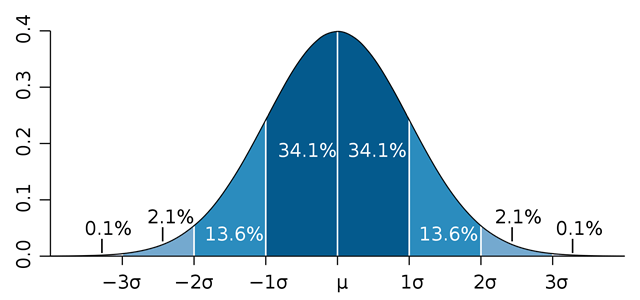


Como podría esto ayudarnos a futuro en el proyecto?

El hecho de reconocer que una misma canción tenga un speechiness variable, ayuda a reconocer que la probabilidad de una persona gustar de una canción **NO depende únicamente de la canción, sino también de las características que acompanhan la canción** , donde al momento de implementar el modelo podriamos solo considerar el 68% de la media de speechiness de una canción para tener mas probabilidades de acertar.

##Función para calcular dispersión en cada variable

In [ ]:
def desvio(feature1):
        df.loc[df['track_name']=='Poison', feature1]
        feature_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist",feature1]]
        print(feature_dataFrame)

        fig, ax= plt.subplots(1,1,figsize=(10,5))
        fig.suptitle(f"Desviación padrao do {feature1}", fontsize=14, y=1.02)

        mean = feature_dataFrame[feature1].mean()
        std = feature_dataFrame[feature1].std()
        cv = (std/mean) * 100

        print(f"media : {mean}")
        print(f"Desviación estandar : {std}")
        print(f"Coeficiente de variación : {cv}")
        count, bins, patches = ax.hist(feature_dataFrame[feature1], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
        # Linha da média
        ax.axvline(mean, color='red', linewidth=2, label='Média', zorder=5)
        # Faixas de desvio padrão
        ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='±1σ (68%)', zorder=3)
        ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='±2σ (95%)', zorder=2)
        ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='±3σ (99.7%)', zorder=1)

        ax.set_title(f'{feature1.replace("_", " ").title()}\nCV: {cv:.1f}%')
        ax.set_xlabel('Valor (cm)')
        ax.set_ylabel('Frequência')
        ax.legend(fontsize=10, loc='upper right')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

##Key : valores de 0 a 11

In [ ]:
feature1="key"
desvio(feature1)

¿Por qué la misma canción tiene diferentes valores de key?

Versiones diferentes: En tu tabla hay varios artistas que tienen canciones llamadas “Poison”. Aunque el nombre es igual, son canciones distintas, por lo que su key puede variar.

Ejemplo: "Poison" de Rita Ora está en A♯/B♭ (key = 10) y "Poison" de Alice Cooper está en D (key = 2).

##Danceability : rango de 0 a 1

Danceability es una métrica de Spotify que mide qué tan fácil es bailar una canción según su ritmo, tempo, regularidad y patrones musicales.

Detalles de Danceability

Rango: 0 a 1

0 → Poco bailable

1 → Muy bailable

Qué analiza:

Tempo: canciones con un ritmo constante y adecuado para bailar suelen tener danceability alta.

Regularidad del beat: un pulso predecible ayuda a seguir la canción con movimientos rítmicos.

Estilo musical: géneros como pop, reggaetón, EDM tienden a tener valores altos, mientras que baladas lentas o jazz libre suelen tener valores bajos.

Ejemplos prácticos

Sexy Bitch → danceability alta (fácil de bailar).

Llorona → danceability baja (más lenta, emotiva, difícil de bailar).

In [ ]:
feature1 = 'danceability'
desvio(feature1)

##Loudness : rango de -60 db a 0db

Loudness es una métrica de Spotify que mide el volumen percibido promedio de una canción, es decir, qué tan “fuerte” suena.

Detalles de Loudness

Unidad: decibelios (dB)

Rango típico: aproximadamente de -60 dB (muy suave) a 0 dB (muy fuerte)

Qué significa:

Valores más altos (cercanos a 0 dB) → canción muy fuerte o intensa.

Valores más bajos (más negativos) → canción suave o tranquila.

Ejemplo práctico

Una canción de EDM o rock puede tener loudness alto (-5 a -3 dB).

Una balada acústica puede tener loudness bajo (-20 a -10 dB).

💡 Tip: Loudness no mide la energía emocional ni el tempo, solo el volumen promedio percibido. Para energía percibida, se usa la métrica energy.

In [ ]:
feature1='loudness'
desvio(feature1)

##Mode : esta variable solo tiene 0 o 1


la variable mode solo indica si la tonalidad es mayor (1) o menor (0). No codifica emociones complejas como rabia, miedo o sorpresa.

**Modo mayor (1)** → típicamente asociado con sensaciones alegres o positivas.

**Modo menor (0)** → típicamente asociado con sensaciones melancólicas o tristes.

Pero emociones como rabia, tensión o euforia no se capturan solo con mode. Para eso existen otras variables en Spotify o en datasets de audio:

**energy** → intensidad o “fuerza” de la canción, alta puede transmitir rabia o euforia.

**valence** → positividad emocional, bajo puede ser tristeza, medio puede ser ambivalente.

**tempo** → velocidad, puede influir en excitación o nerviosismo.

**loudness** → volumen percibido, canciones muy fuertes pueden transmitir agresividad.

Entonces, mode es solo una parte del “sentimiento” musical, y para emociones más complejas necesitas combinar varias variables.

In [ ]:
feature='mode'
desvio(feature)

##Acousticness : rango de 0 a 1

En los datasets de música como los de Spotify, acousticness es una medida que indica qué tan “acústica” es una canción. Es un valor continuo que va de 0 a 1:

0 → poca probabilidad de ser acústica, la canción probablemente tenga muchos instrumentos electrónicos o sintetizados.

1 → muy alta probabilidad de ser acústica, es decir, la canción suena más natural, con instrumentos acústicos como guitarra, piano, voz sin efectos electrónicos, etc.

**Ejemplo**

“Llorona” (dependiendo de la versión que se analice) suele ser una canción tradicional, con instrumentos acústicos como guitarra, voz sin muchos efectos electrónicos. Por eso, su acousticness sería relativamente alta, más cercana a 1.

“Sexy Bitch” de David Guetta ft. Akon es una canción electrónica/dance, con muchos sintetizadores, beats producidos digitalmente y efectos electrónicos. Por lo tanto, su acousticness sería baja, cercana a 0.

In [ ]:
feature1='acousticness'
desvio(feature1)

##Instrumentalness : Probabilidad de 0 a 1

Qué tan “instrumental” es la canción, es decir, la probabilidad de que no haya voces humanas presentes.

Rango de valores: 0 a 1 (0 = probablemente hay voces, 1 = probablemente no hay voces).

Ejemplo: Una pista de piano solo o una canción de orquesta sin cantantes tendría un instrumentalness alto. Una canción pop con cantante principal tendría un instrumentalness bajo, aunque use instrumentos acústicos.

In [ ]:
feature1='instrumentalness'
desvio(feature1)

##Liveness : Probabilidad de 0 a 1

Detalles de Liveness

Rango: 0 a 1

0 → Muy poco probable que sea en vivo.

1 → Muy probable que sea en vivo.

Qué detecta: Sonidos típicos de un concierto o presentación en vivo, como:

Aplausos o vítores de la audiencia.

Eco o reverberación de un espacio grande.

Interacción de los músicos con el público.

Ejemplo práctico

Una grabación de estudio de una canción pop tendría liveness bajo (0.1–0.3).

Una versión en vivo de una canción de rock en un estadio podría tener liveness alto (0.7–0.9).

In [ ]:
feature1='liveness'
desvio(feature1)

##Valence : Rango de 0 a 1

**Detalles de Valence**

Rango: 0 a 1

0 → Muy baja valencia → canción triste, melancólica o negativa.

1 → Muy alta valencia → canción feliz, alegre o positiva.

Qué detecta: La “sensación” general que transmite la canción según el análisis de ritmo, tonalidad, tempo y otros elementos acústicos.

**Ejemplos prácticos**

Una balada triste o una canción melancólica → valence baja.

Una canción pop divertida o una canción de fiesta → valence alta.

In [ ]:
feature1='valence'
desvio(feature1)

| Métrica              | Rango típico en canciones | Comentario                                                                    |
| -------------------- | ------------------------- | ----------------------------------------------------------------------------- |
| **Acousticness**     | 0.0 – 1.0                 | 0 = nada acústica, 1 = totalmente acústica                                    |
| **Instrumentalness** | 0.0 – 1.0                 | 0 = hay voces, 1 = sin voces                                                  |
| **Liveness**         | 0.1 – 0.9                 | Valores cercanos a 1 indican grabación en vivo; rara vez es exactamente 0 o 1 |
| **Valence**          | 0.0 – 1.0                 | 0 = triste/negativa, 1 = alegre/positiva                                      |
| **Danceability**     | 0.2 – 0.95                | Raras canciones tienen <0.2 o >0.95                                           |
| **Loudness**         | -60 dB – 0 dB             | Canciones muy suaves ~-40 dB, muy fuertes ~-5 dB                              |
| **Energy**           | 0.1 – 0.95                | 0 = tranquila, 1 = muy intensa                                                |
| **Key**              | 0 – 11                    | 0 = C, 1 = C♯/D♭ … 11 = B                                                     |
| **Mode**             | 0 – 1                     | 0 = menor, 1 = mayor                                                          |
|**Speechiness**       | 0 – 1                      | 0 = Poca presencia de voz, 1 = Predominante palabras habladas (audiolibros, podcast, rap)|


# Analisis exploratorio de datos


##Fase 1 : Compreensao dos dados

**Fase 1: Compreensão dos Dados** 🏗️
- [x] Estrutura e tipos de dados
- [x] Qualidade dos dados (missing, duplicatas)
- [x] Estatísticas resumidas

### Compreensão dos dados

Estrutura e tipos de dados

In [ ]:
# @title
print("🏗️ ESTRUTURA DOS DADOS")
print("=" * 50)

# Informações básicas
print(f"\n📊 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"\n📝 Tipos de dados:")
print(df.dtypes)

# Memória utilizada
memoria = df.memory_usage(deep=True).sum() / 1024
print(f"\n💾 Memória utilizada: {memoria:.2f} KB")

# Valores únicos
print(f"\n🔢 Valores únicos por coluna:")
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"  {col}: {n_unique} valores únicos")

Qualidade dos dados

Problema que resolve:

O erro TypeError: can only concatenate str (not "int") to str acontece porque dentro da mesma coluna existem valores de tipos diferentes (ex.: alguns números int/float e algumas strings str).

Como o pandas não consegue decidir se deve somar ou concatenar, ele quebra e mostra o erro.

Por que colocamos esse método:

O método 2 percorre todas as colunas que estão como object (potenciais problemáticas) e lista quais delas possuem mais de um tipo de dado dentro.

Assim, você consegue identificar rapidamente qual coluna está misturando números e texto, sem precisar testar manualmente uma por uma.

In [ ]:
for col in df.select_dtypes(include="object"):
    tipos = df[col].apply(type).unique()
    if len(tipos) > 1:
        print(f"⚠️ Coluna '{col}' tem mistura de tipos: {tipos}")

In [ ]:
# @title
print("🔍 QUALIDADE DOS DADOS")
print("=" * 50)

features= ['track_name','track_artist','track_album_name']

for feature in features:
  df[feature] = df[feature].astype(str)
  #print(df[feature].sum())  # agora concatena tudo


# Valores ausentes
missing = df.isnull().sum()
print(f"\n❌ Valores ausentes:")
missing= df.isnull().sum()
print(missing)

# Duplicatas
duplicatas = df.duplicated().sum()
print(f"\n🔄 Linhas duplicadas: {duplicatas}")
if duplicatas > 0:
    print(f"  ⚠️ {duplicatas} linhas duplicadas encontradas")

# Balanceamento das classes
print(f"\n⚖️ Distribuição do genero musical:")
genre_counts = df['playlist_genre'].value_counts()
for species, count in genre_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {species}: {count} ({pct:.1f}%)")

if genre_counts.std() < 1:

    print("  ✅ Dataset perfeitamente balanceado!")
else:
    print("  ⚠️ Dataset desbalanceado!")

print(genre_counts.std())
print(genre_counts)


In [ ]:
data = {
    "playlist_genre": ["edm", "rap", "pop", "r&b", "latin", "rock"],
    "count": [6043, 5746, 5507, 5431, 5155, 4951]
}

df = pd.DataFrame(data)

# Calcular media y desviación estándar
media = df["count"].mean()
std = df["count"].std()

# Gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(df["playlist_genre"], df["count"], color="skyblue", edgecolor="black")

# Línea de media
plt.axhline(media, color="green", linestyle="--", label=f"Media = {media:.0f}")

# Líneas de ±1 std
plt.axhline(media + std, color="orange", linestyle="--", label=f"+1 std = {media+std:.0f}")
plt.axhline(media - std, color="orange", linestyle="--", label=f"-1 std = {media-std:.0f}")

# Etiquetas
plt.title("Cantidad de canciones por género de playlist")
plt.ylabel("Número de canciones")
plt.xlabel("Género")
plt.legend()
plt.show()

##Fase 2 : Análise univariada

**Fase 2: Análise Univariada** 📊
- [ ] Distribuições individuais
- [ ] Outliers e anomalias
- [ ] Características específicas

In [ ]:
# @title


# Pairplot avançado com customizações
g = sns.pairplot(df,
                hue='playlist_genre',
                height=2.5,
                aspect=1.1,
                markers=["edm", "rap", "pop", "r&b", "latin", "rock"],
                diag_kind='kde',
                plot_kws={'alpha': 0.7, 'edgecolor': 'white', 'linewidth': 0.5},
                diag_kws={'alpha': 0.7, 'linewidth': 2})

g.fig.suptitle('Análise Multivariada: Todas as Relações em Uma Visualização',
              y=1.02, size=20, weight='bold')

# Adicionando anotações
g.axes[0, 0].annotate('Distribuições\nna diagonal',
                     xy=(0.5, 0.95),
                     xycoords='axes fraction',
                     ha='center',
                     fontsize=9,
                     bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.show()

print("🎯 INSIGHTS DO PAIRPLOT:")
print("• Diagonal: Distribuições de cada característica por espéci11e")
print("• Off-diagonal: Relações bivariadas entre características")
print("• Setosa (círculos): Claramente separada das outras espécies")
print("• Versicolor (quadrados) e Virginica (diamantes): Alguma sobreposição")
print("• Características da pétala: Melhor separação entre espécies")

La KDE **(Kernel Density Estimation, o Estimación de Densidad de Kernel)** es una técnica de estadística para estimar la densidad de probabilidad de una variable continua a partir de un conjunto de datos. En otras palabras, te permite visualizar cómo se distribuyen tus datos, pero de forma suave, sin depender de los intervalos rígidos de un histograma.

#Visualizaciones de las variables



##Heatmap

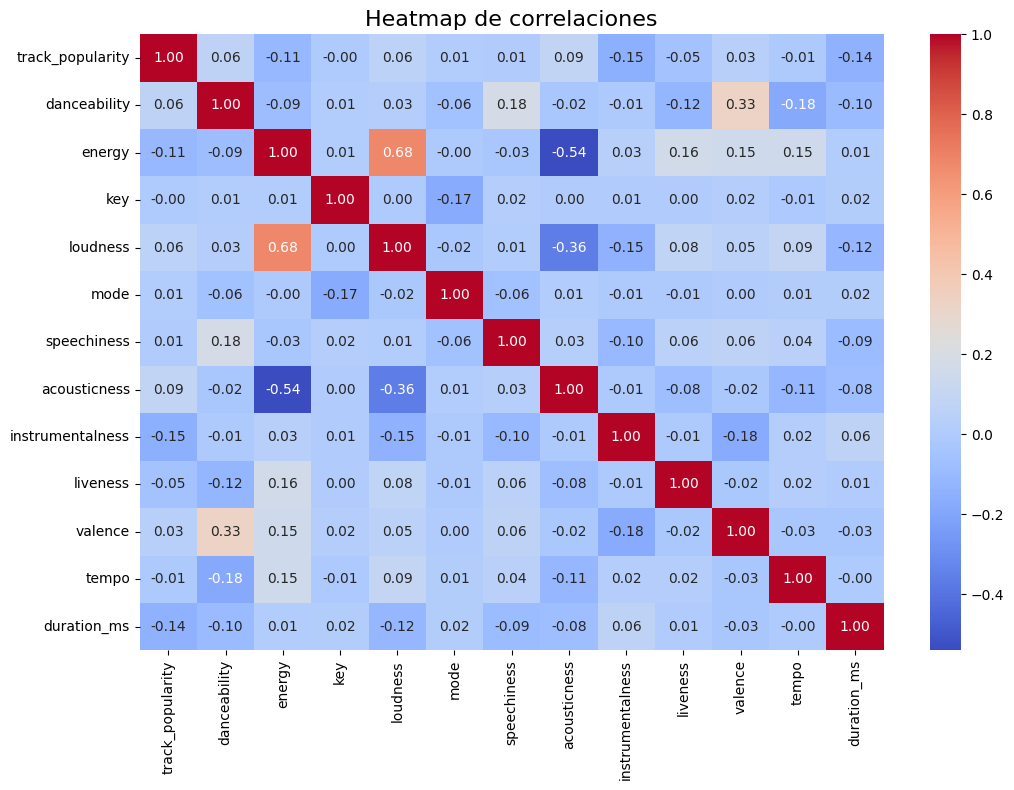

In [ ]:
#Seleccionar apenas as variáveis numéricas
df_num = df.select_dtypes(include=['float64','int64'])
#Calcular a matriz de correlacao
corr= df_num.corr()
#Plotear o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot= True, fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Heatmap de correlaciones", fontsize = 16)
plt.show()


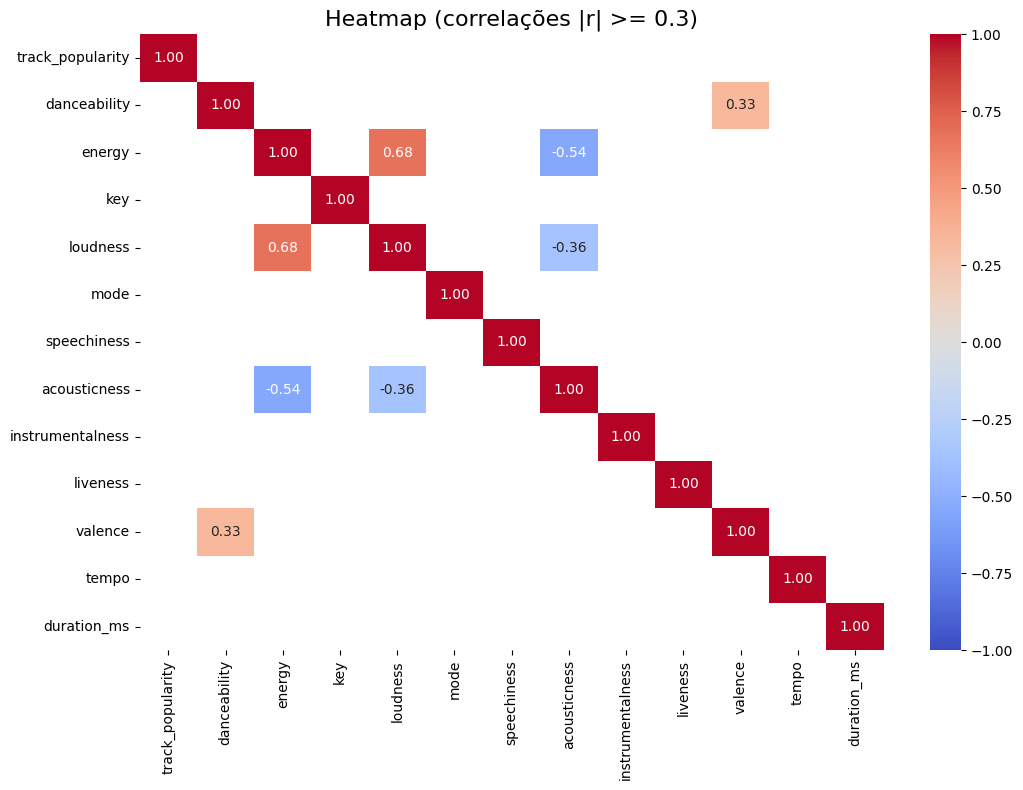

In [ ]:
mask = corr.abs()<0.3
corr_filtered=corr.mask(mask)

# Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            vmin=-1, vmax=1)
plt.title("Heatmap (correlações |r| >= 0.3)", fontsize=16)
plt.show()

Loudness - Danceability : 0.68

Acousticness - Energy : -0.54

Valence - Danceability : 0.33

Acosticness - Loudness : -0.36

Loudness × Danceability (0.68) → músicas mais altas tendem a ser mais dançantes.

👉 Isso pode confirmar que faixas para pista (balada, EDM) são masterizadas mais altas.

Acousticness × Energy (-0.54) → músicas mais acústicas são menos energéticas.

👉 Faz sentido: violão/voz → menos energia do que beats eletrônicos.

Valence × Danceability (0.33) → músicas mais felizes também são mais dançantes, mas a relação não é tão forte.

👉 Pode ser cultural: nem toda música feliz é feita para dançar.

Acousticness × Loudness (-0.36) → músicas acústicas tendem a ser menos altas.

👉 Reflete o estilo de produção (baladas acústicas x músicas de festa).

##Scatterplots

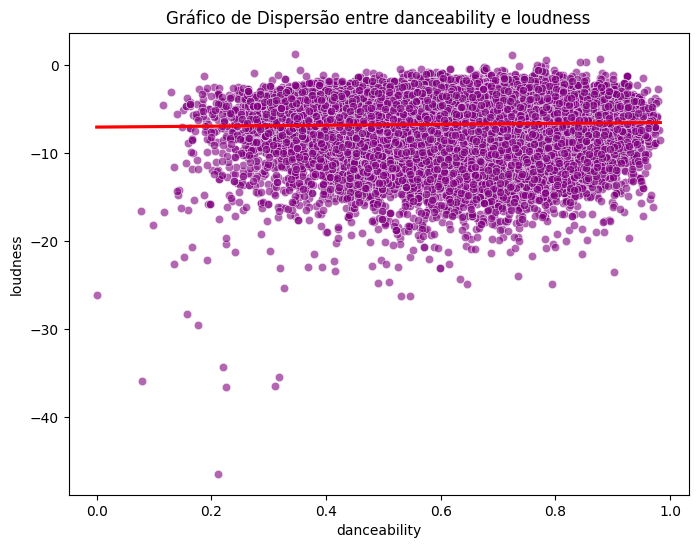

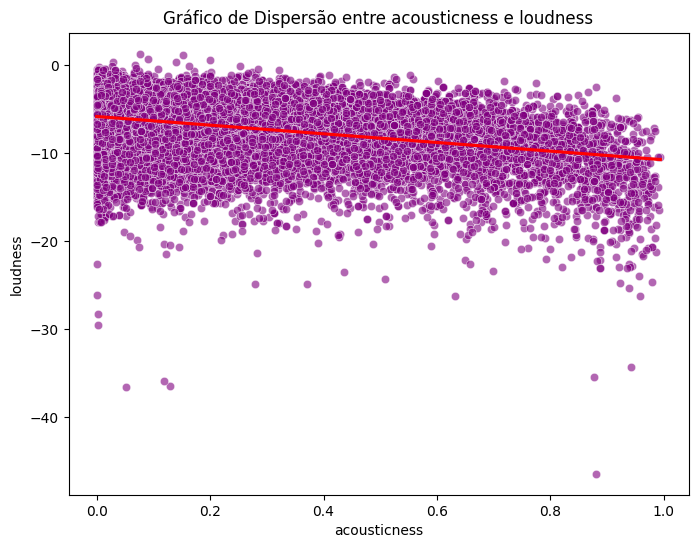

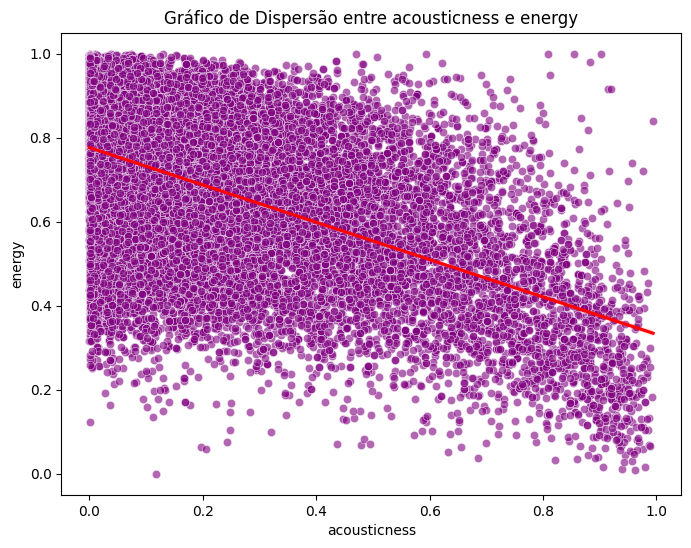

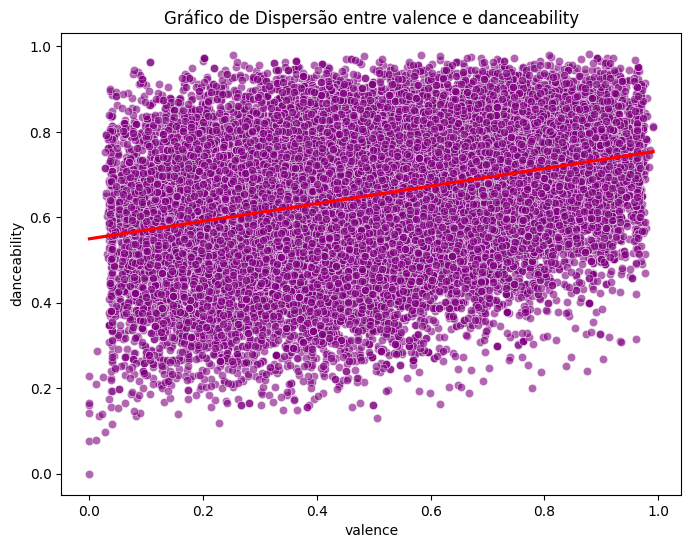

In [ ]:
pairs = [('danceability','loudness'),('acousticness','loudness'),('acousticness','energy'),('valence','danceability')]

for x,y in pairs:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data= df, x=x, y=y,color='purple', alpha=0.6)
  sns.regplot(data=df, x=x, y=y, scatter=False, color="red")
  plt.title(f"Gráfico de Dispersão entre {x} e {y}")
  plt.show()



##Pairplot

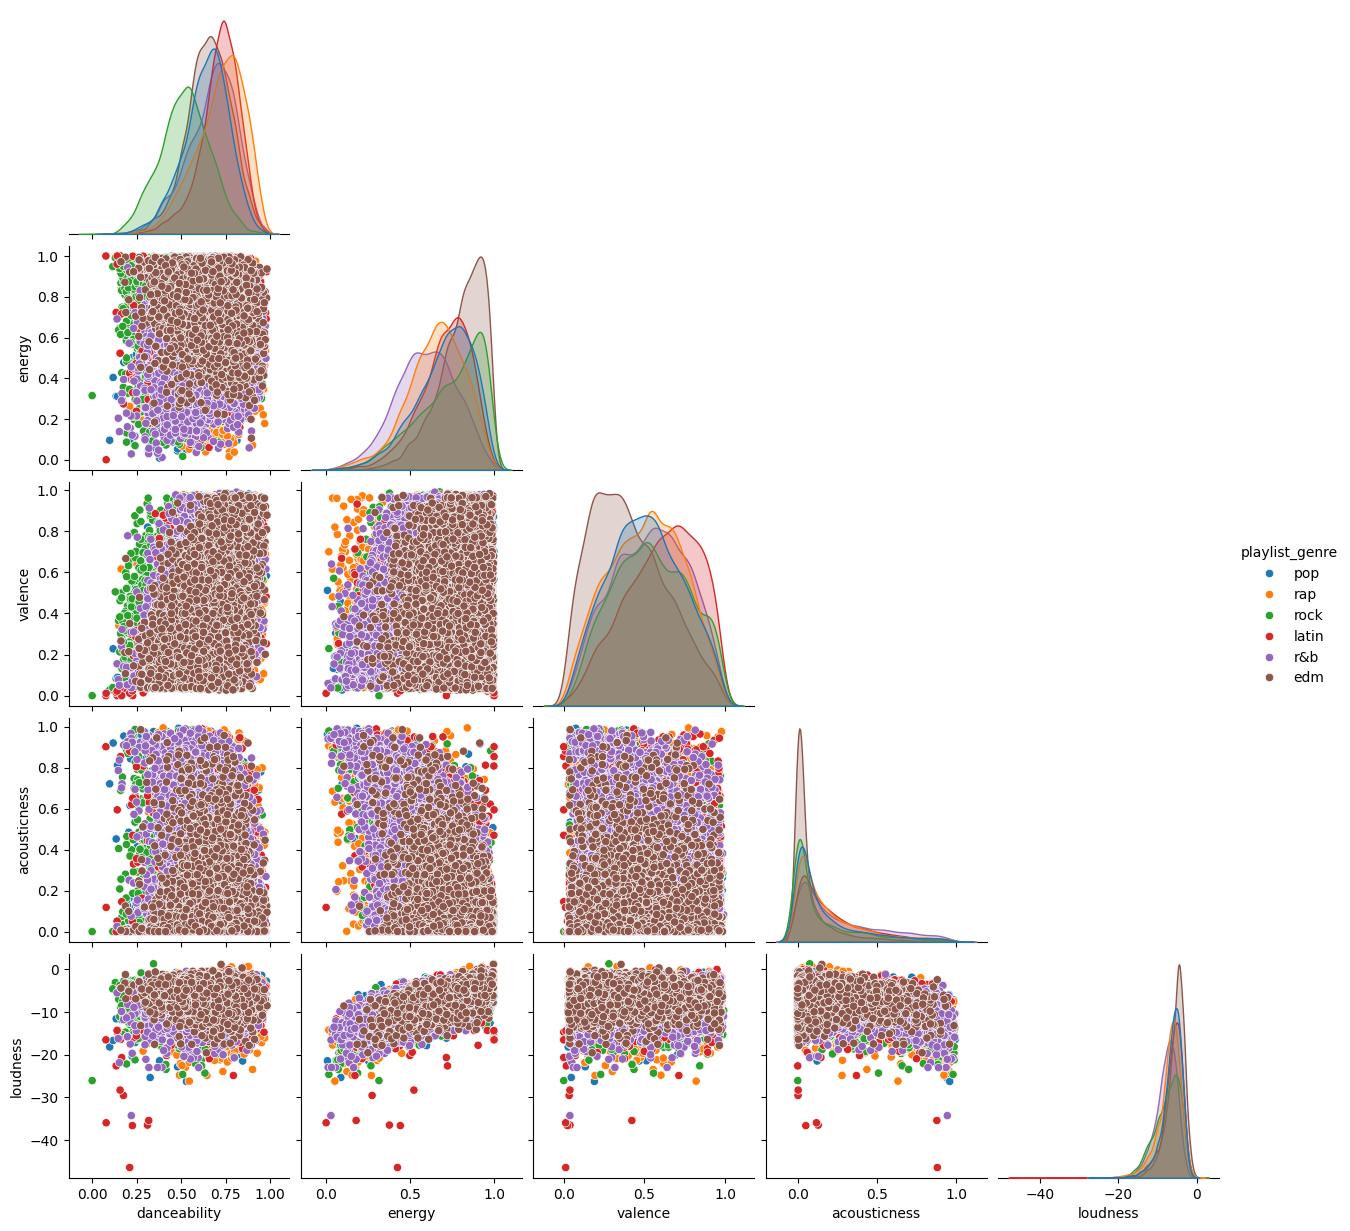

In [ ]:
vars_to_plot = ['danceability','energy','valence','acousticness','loudness']
sns.pairplot(df[vars_to_plot].join(df['playlist_genre']), hue='playlist_genre', corner=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Contar frecuencia real (no normalizada)
frecuencias = df['track_name'].value_counts()
print(frecuencias)


# Tomar las últimas 5 canciones
ultimas_5 = frecuencias.head(5)

# Graficar
plt.style.use("dark_background")
plt.figure(figsize=(10,6))  # Más ancho
ultimas_5.plot(kind='bar', color='skyblue')
plt.title('Frecuencias das 5 músicas mais ouvidas')
plt.xlabel('música')
plt.ylabel('Número de reproduções')
plt.xticks(rotation=30, ha='right')  # Rotar etiquetas para que no se sobrepongan
plt.ylim(0, ultimas_5.max() + 2)  # Ajusta el límite del eje Y
plt.tight_layout()  # Evita que se corten las etiquetas
plt.show()


NameError: name 'df' is not defined

#Implementação de clustering

##Escolher as variavéis

Use variáveis numéricas (idade, renda, notas, etc.).

Se tiver categóricas, precisa converter (ex.: One-Hot Encoding).

###One-Hot Encoding

In [56]:
df_categorico = df.select_dtypes(include=['object'])
#print(df_categorico)
print(df_categorico.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre'],
      dtype='object')


In [57]:
columns= ['track_id','track_name','track_album_id','track_album_name','playlist_id','track_album_release_date']
df_categorico = df_categorico.drop(columns, axis = 1)
print(df_categorico.columns)

Index(['track_artist', 'playlist_name', 'playlist_genre', 'playlist_subgenre'], dtype='object')


In [24]:
#One Hot Encoding com pandas
df_categorico_encode = pd.get_dummies(df_categorico, df_categorico.columns)


Index(['track_artist_!!!', 'track_artist_!deladap',
       'track_artist_"Dear Evan Hansen" August 2018 Broadway Cast',
       'track_artist_#TocoParaVos', 'track_artist_$ANFI', 'track_artist_$IFRA',
       'track_artist_$uicideBoy$', 'track_artist_'Til Tuesday',
       'track_artist_(G)I-DLE', 'track_artist_(Sandy) Alex G',
       ...
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave',
       'playlist_subgenre_pop edm', 'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house',
       'playlist_subgenre_reggaeton', 'playlist_subgenre_southern hip hop',
       'playlist_subgenre_trap', 'playlist_subgenre_tropical',
       'playlist_subgenre_urban contemporary'],
      dtype='object', length=11171)
       track_artist_!!!  track_artist_!deladap  \
0                 False                  False   
1                 False                  False   
2                 False                  False   
3                 False            

## Pre-processamento de dados

[ ]Normalizar/Padronizar (para que uma variável não domine as outras).

[x]Tratar valores faltantes.


###Normalizar

In [61]:
df_numerico = df.select_dtypes(include=['float64','int64'])
print(df_numerico)

       track_popularity  danceability  energy  key  loudness  mode  \
0                    66         0.748   0.916    6    -2.634     1   
1                    67         0.726   0.815   11    -4.969     1   
2                    70         0.675   0.931    1    -3.432     0   
3                    60         0.718   0.930    7    -3.778     1   
4                    69         0.650   0.833    1    -4.672     1   
...                 ...           ...     ...  ...       ...   ...   
32828                42         0.428   0.922    2    -1.814     1   
32829                20         0.522   0.786    0    -4.462     1   
32830                14         0.529   0.821    6    -4.899     0   
32831                15         0.626   0.888    2    -3.361     1   
32832                27         0.603   0.884    5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0583      0.102000          0.000000    0.0653   0.5180   
1           0

In [59]:
def normalizar(x, x_min, x_max):
  x = (x - x_min)/(x_max - x_min)
  return x


In [60]:

features = ['loudness','key']
for feature in features:
  df_numerico[feature] = normalizar(df_numerico[feature], df_numerico[feature].min(), df_numerico[feature].max())
print(df_numerico)

       track_popularity  danceability  energy       key  loudness  mode  \
0                    66         0.748   0.916  0.545455  0.918090     1   
1                    67         0.726   0.815  1.000000  0.869162     1   
2                    70         0.675   0.931  0.090909  0.901368     0   
3                    60         0.718   0.930  0.636364  0.894118     1   
4                    69         0.650   0.833  0.090909  0.875385     1   
...                 ...           ...     ...       ...       ...   ...   
32828                42         0.428   0.922  0.181818  0.935272     1   
32829                20         0.522   0.786  0.000000  0.879785     1   
32830                14         0.529   0.821  0.545455  0.870628     0   
32831                15         0.626   0.888  0.181818  0.902856     1   
32832                27         0.603   0.884  0.454545  0.877501     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0583      0.

###Padronizar

In [45]:
df_numerico = df.select_dtypes(include=['float64','int64'])


In [46]:
def padronizar(x, mean, desvio):
  x = (x-mean)/desvio
  return x

In [50]:
df_numerico_padronizar = df_numerico.copy()
for feature in df_numerico_padronizar.columns:
  mean  = df_numerico[feature].mean()
  desvio = df_numerico[feature].std()
  df_numerico[feature] = padronizar(df_numerico[feature],mean,desvio)


print(df_numerico_padronizar)

       track_popularity  danceability    energy       key  loudness      mode  \
0              0.941517      0.642039  1.201596  0.173197  1.367103  0.876164   
1              0.981542      0.490404  0.643307  1.557603  0.585758  0.876164   
2              1.101619      0.138887  1.284510 -1.211209  1.100073 -1.141305   
3              0.701364      0.435264  1.278982  0.450078  0.984294  0.876164   
4              1.061593     -0.033425  0.742804 -1.211209  0.685141  0.876164   
...                 ...           ...       ...       ...       ...       ...   
32828         -0.019095     -1.563559  1.234761 -0.934327  1.641494  0.876164   
32829         -0.899656     -0.915665  0.483007 -1.488090  0.755411  0.876164   
32830         -1.139809     -0.867417  0.676473  0.173197  0.609181 -1.141305   
32831         -1.099784     -0.198845  1.046823 -0.934327  1.123832  0.876164   
32832         -0.619478     -0.357373  1.024712 -0.103684  0.718938 -1.141305   

       speechiness  acousti

In [53]:
print(df_numerico_padronizar.mean())
print(df_numerico_padronizar.std())

track_popularity   -1.506222e-16
danceability        1.726961e-16
energy              3.802344e-16
key                -1.231244e-16
loudness            2.077547e-17
mode               -5.707844e-18
speechiness        -1.285482e-16
acousticness        3.981965e-17
instrumentalness    4.652840e-18
liveness            1.271145e-16
valence             1.525699e-16
tempo               2.045085e-17
duration_ms         1.805951e-16
dtype: float64
track_popularity    1.0
danceability        1.0
energy              1.0
key                 1.0
loudness            1.0
mode                1.0
speechiness         1.0
acousticness        1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
duration_ms         1.0
dtype: float64


##Escolher algoritmo de clustering (K-Means)

###Definir número de clusters (k)

K-Means precisa que você diga quantos grupos quer criar.

Método comum: Elbow Method (curva do cotovelo)

Outra métrica: Silhouette Score (quanto mais próximo de 1, melhor)

In [ ]:
from sklearn.cluster import

#